# PREDICTION OF HOUSE PRICES
The main aim of this project is to predict house prices based on the features in the dataset.
Steps taken in House Price Prediction
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building


In [1]:
# Import libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Read data

dataset = pd.read_csv('/Users/asumankabugo/Desktop/Melbourne_housing_FULL.csv')

In [3]:
# Number of rows and columns

print(dataset.shape)

(34857, 21)


In [4]:
# View first few records

dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# In Data Analysis, we will Analyse the following
1. Missing values
2. All the numerical variables
3. Distribution of Numerical variables
4. Categorical variables
5. Relationship between independent and dependent feature(Price)

In [5]:
# Here we will check the percentage of nan values present in each feature
# 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

# 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 3),  ' % missing values')

Price 0.218  % missing values
Bedroom2 0.236  % missing values
Bathroom 0.236  % missing values
Car 0.25  % missing values
Landsize 0.339  % missing values
BuildingArea 0.606  % missing values
YearBuilt 0.554  % missing values
CouncilArea 0.0  % missing values
Lattitude 0.229  % missing values
Longtitude 0.229  % missing values
Regionname 0.0  % missing values
Propertycount 0.0  % missing values


# Since there are missing values, we need to find the realtionship between the missing values and Price
Let's plot some diagram for this relationship

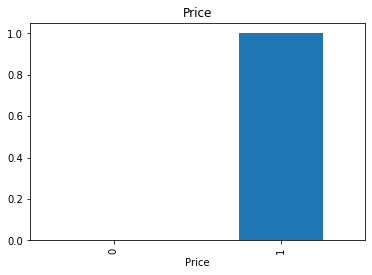

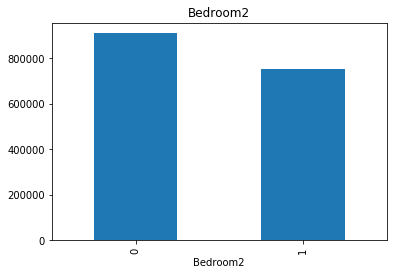

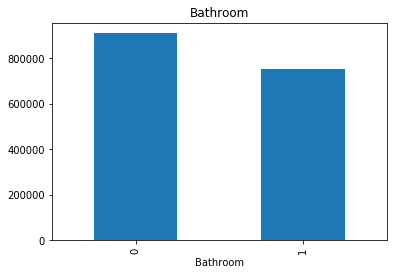

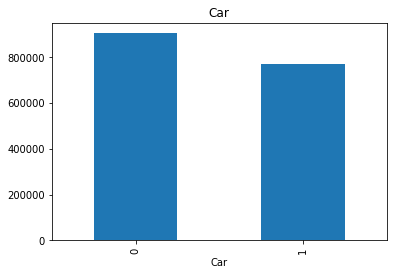

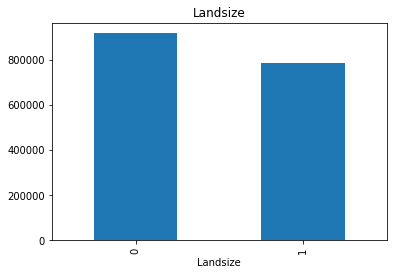

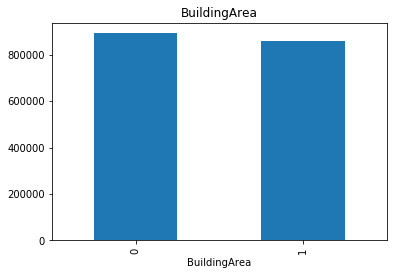

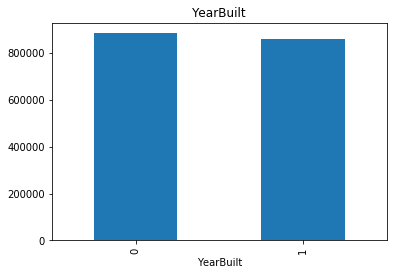

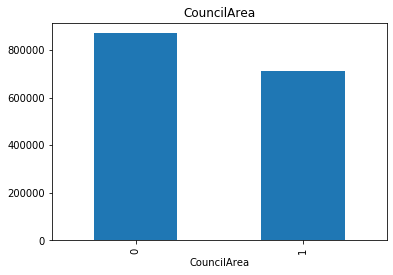

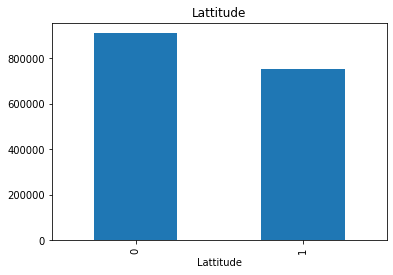

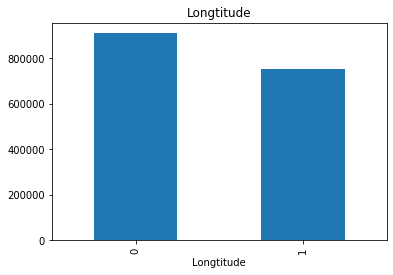

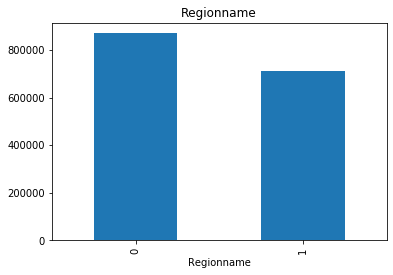

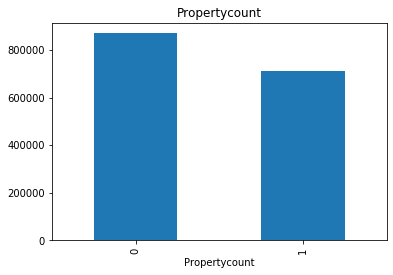

In [6]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Price'].median().plot.bar()
    plt.title(feature)
    plt.show()

The output of the barcharts above indicate that the relationship between the missing values and the dependent variable is clearly visible. Therefore we need to replace these NAN values with something meaningful which we will perform in the Feature Engineering section. 

# Analysis of Numerical variables

In [7]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  13


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


# Temporal Variables such as DateTime
From the Dataset we have 2 year variables. We have to extract information from the datetime variables like number of years or number of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering

In [8]:
# Convert to date object

dataset['Date'] = pd.to_datetime(dataset['Date'])

In [9]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Text(0.5, 1.0, 'House Price vs Date Sold')

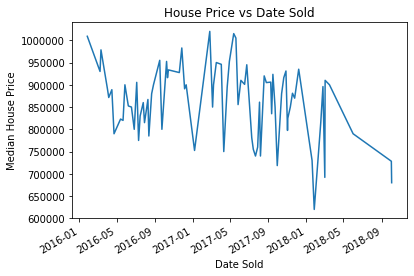

In [10]:
# Lets analyse the Temporal Datetime Variables
# We will find out whether there is a relationship between the year the house was sold and the sales price

dataset.groupby('Date')['Price'].median().plot()
plt.xlabel('Date Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs Date Sold")

The diagram above indicates the price kept on falling in a zig zag formation to the lowest in 2018-05 but increased a bit late 2018.  We would expect house prices to increase. Therefore we will need to analyse the difference between all 'years' and dependent variable 'SalePrice'

In [11]:
# Add age variable
dataset['Age'] = 2018 - dataset['YearBuilt']

Text(0.5, 1.0, 'House Price vs Age of house')

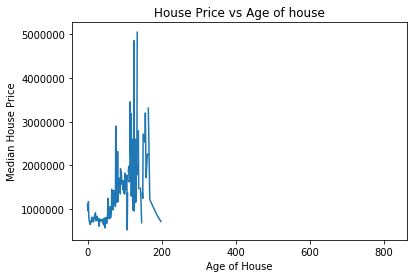

In [12]:
# We will find out whether there is a relationship between the age and price

dataset.groupby('Age')['Price'].median().plot()
plt.xlabel('Age of House')
plt.ylabel('Median House Price')
plt.title("House Price vs Age of house")

The output above indicates the most expensive houses are between 120-140 years old with the cheapest houses at 40 years old

In [13]:
#identify continous faetures
continous_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='Float64']
continous_features

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


['Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Age']

In [14]:
dataset[continous_features].head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age
0,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0,NaN
1,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0,NaN
2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,118.0
3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0,NaN
4,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,118.0


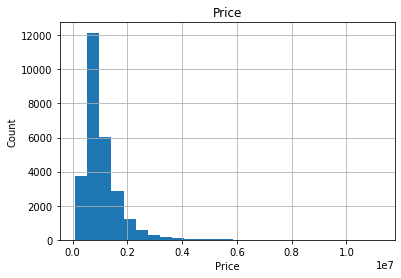

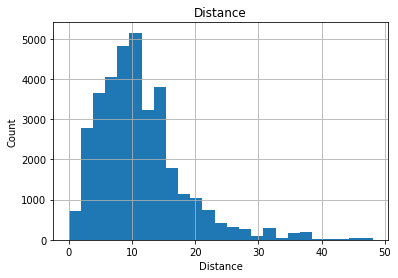

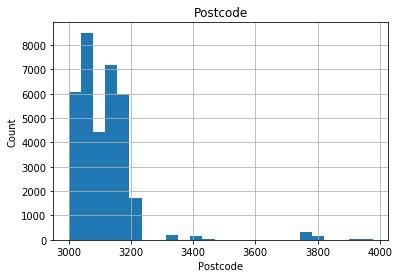

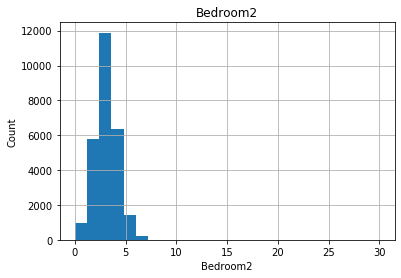

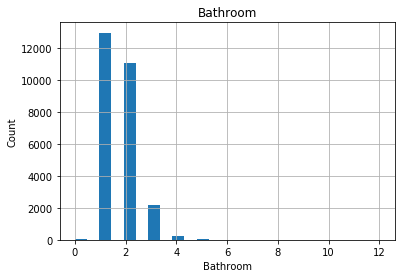

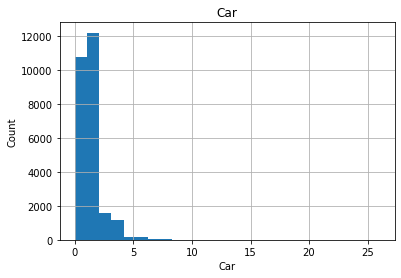

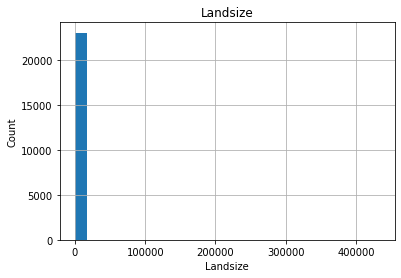

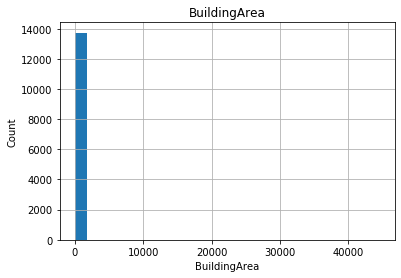

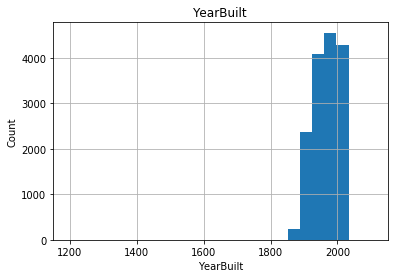

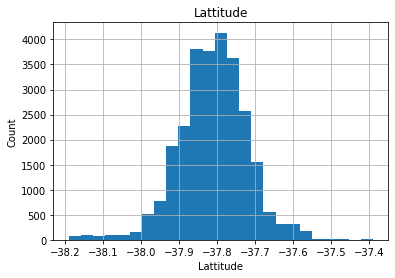

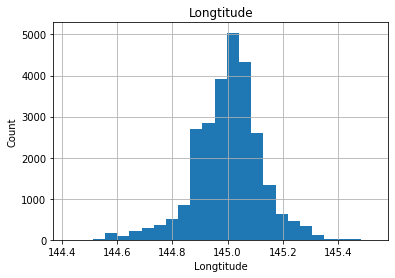

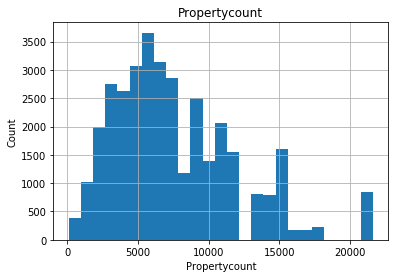

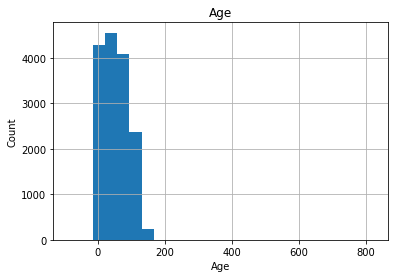

In [15]:
# Lets analyse the continuous variables by creating histograms to understand the distribution

for feature in continous_features:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

All the outputs above indicate that the data is skewed. The distribution is not normal. Therefore, to normalise the distribution, we will use log transformation.

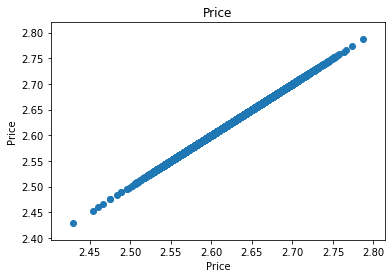

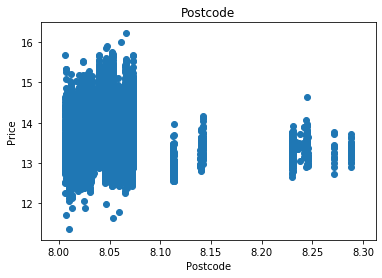

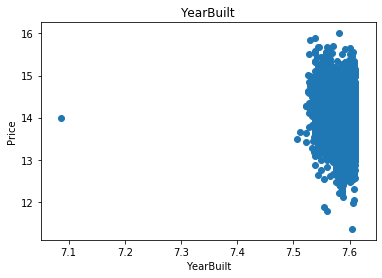

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


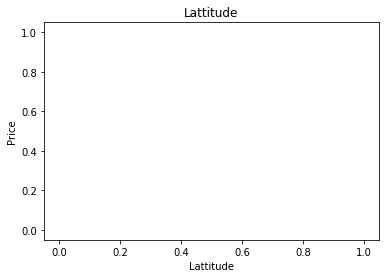

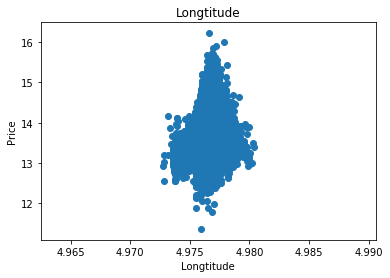

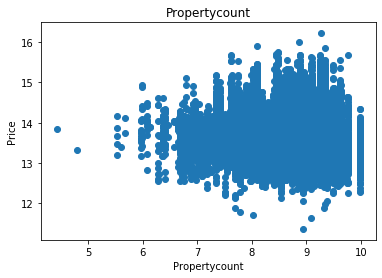

In [16]:
# We will be using logarithmic transformation
for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

The outputs above indicate there is a monotonic relationship between the continous features and price.

# Analysis of Categorical Variables

In [17]:
#identify categroical faetures
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='object']
categorical_features

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

In [18]:
dataset[categorical_features].head()

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,Yarra City Council,Northern Metropolitan


In [19]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Suburb and number of categories are 351
The feature is Address and number of categories are 34009
The feature is Type and number of categories are 3
The feature is Method and number of categories are 9
The feature is SellerG and number of categories are 388
The feature is CouncilArea and number of categories are 34
The feature is Regionname and number of categories are 9


features Surburb, Address, and sellerG have high numbers, therefore we drop them for the analysis

In [20]:

new_categorical_features = ['Type', 'Method', 'CouncilArea', 'Regionname']

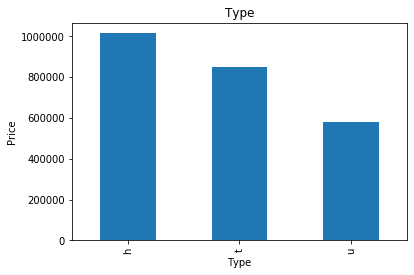

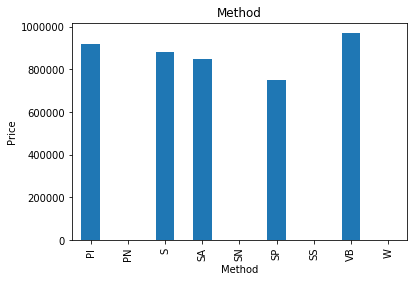

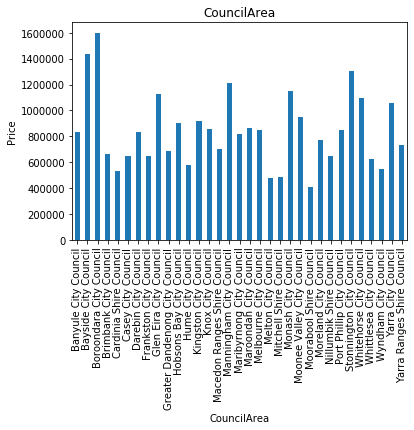

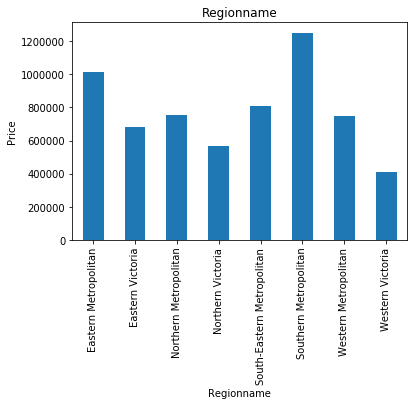

In [21]:
# Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in new_categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

Outpus above indicate there is relationship between new categorical features and Price

#  Feature Engineering
We will be performing all the steps below in Feature Engineering
1. Missing values
2. Categorical variables
3. Standarise the values of the variables to the same range

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [23]:
# To stop data leakage we need to split the data first and then apply Feature Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['Price'],test_size=0.1,random_state=0)

In [24]:
X_train.shape, X_test.shape

((31371, 22), (3486, 22))

In [25]:
# Let us capture all the NAN values
# First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='object']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().sum())))

CouncilArea: 3% missing values
Regionname: 3% missing values


In [26]:
# Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

CouncilArea    0
Regionname     0
dtype: int64

In [27]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,118.0


In [28]:
# Now lets check for numerical variables that contain missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

# We will print the numerical NAN variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),3)))

Price: 0.218% missing value
Bedroom2: 0.236% missing value
Bathroom: 0.236% missing value
Car: 0.25% missing value
Landsize: 0.339% missing value
BuildingArea: 0.606% missing value
YearBuilt: 0.554% missing value
Lattitude: 0.229% missing value
Longtitude: 0.229% missing value
Propertycount: 0.0% missing value
Age: 0.554% missing value


In [29]:
# Replacing the numerical Missing Values

for feature in numerical_with_nan:
# We will replace by using median since there are outliers
    median_value=dataset[feature].median()

In [30]:
dataset.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,118.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,NaN
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,12.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08,2.5,3067.0,...,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,118.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08,2.5,3067.0,...,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0,118.0


In [31]:
# Remove rows missing data
dataset = dataset.dropna()

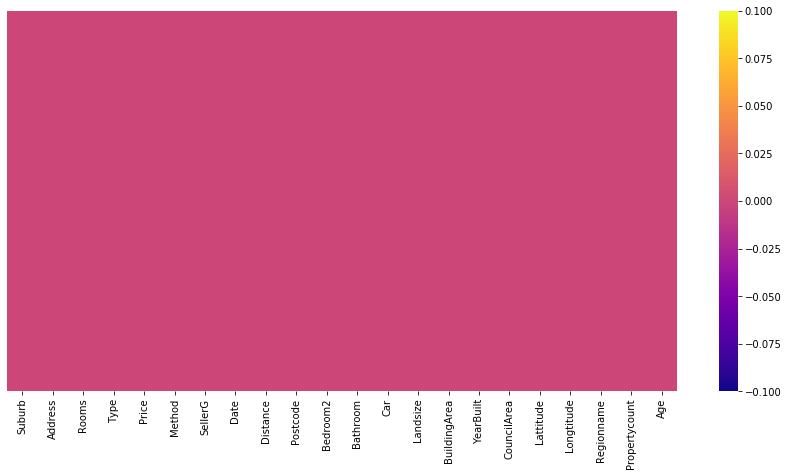

In [32]:
## visualizing missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(dataset.isnull(), yticklabels=False,cmap='plasma')

The output above indicates the dataset contains no missing values

# For Numerical Variables
Since the numerical variables are skewed we will perform log normal distribution

In [33]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,118.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,108.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,128.0


# Encoding

In [34]:
#Encoding caterogical features
dataset=pd.get_dummies(dataset, columns=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'])
dataset

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,...,1,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,...,1,0,0,0,1,0,0,0,0,0
6,4,1600000.0,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,...,1,0,0,0,1,0,0,0,0,0
11,3,1876000.0,2016-07-05,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,...,1,0,0,0,1,0,0,0,0,0
14,2,1636000.0,2016-08-10,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,3,500000.0,2018-02-24,25.5,3750.0,3.0,2.0,2.0,383.0,118.0,...,0,0,0,0,1,0,0,0,0,0
34849,3,570000.0,2018-02-24,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,...,0,0,0,0,1,0,0,0,0,0
34853,2,888000.0,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,...,0,0,0,0,0,0,0,0,1,0


# Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
columns_to_scale = ['Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount','Age']
dataset[columns_to_scale] = Scaler.fit_transform(dataset[columns_to_scale])

In [36]:
dataset.head()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2016-04-02,0.052743,0.068577,0.166667,0.000,0.0,0.003645,0.025386,...,1,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2017-04-03,0.052743,0.068577,0.250000,0.125,0.0,0.003131,0.048201,...,1,0,0,0,1,0,0,0,0,0
6,4,1600000.0,2016-04-06,0.052743,0.068577,0.250000,0.000,0.2,0.002804,0.045630,...,1,0,0,0,1,0,0,0,0,0
11,3,1876000.0,2016-07-05,0.052743,0.068577,0.333333,0.125,0.0,0.005724,0.067481,...,1,0,0,0,1,0,0,0,0,0
14,2,1636000.0,2016-08-10,0.052743,0.068577,0.166667,0.000,0.2,0.005981,0.034383,...,1,0,0,0,1,0,0,0,0,0


In [37]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Price']].reset_index(drop=True),
                    pd.DataFrame(Scaler.transform(dataset[columns_to_scale]), columns=columns_to_scale)],
                    axis=1)

In [38]:
data.head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age
0,1035000.0,0.001113,-3.070554,0.013889,-0.125000,0.00,8.516028e-08,0.000008,-1.452181,50.383289,-130.520938,-0.011627,0.001391
1,1465000.0,0.001113,-3.070554,0.020833,-0.109375,0.00,7.315049e-08,0.000015,-1.452181,50.380910,-130.520115,-0.011627,0.001391
2,1600000.0,0.001113,-3.070554,0.020833,-0.125000,0.02,6.550790e-08,0.000015,-1.452012,50.384478,-130.520362,-0.011627,0.001222
3,1876000.0,0.001113,-3.070554,0.027778,-0.109375,0.00,1.337453e-07,0.000022,-1.452166,50.392634,-130.516084,-0.011627,0.001376
4,1636000.0,0.001113,-3.070554,0.013889,-0.125000,0.02,1.397502e-07,0.000011,-1.452195,50.386517,-130.519292,-0.011627,0.001406


# Feature Selection
Lasso regression will be applied

In [39]:
## for feature slection
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [40]:
# Capture the dependent feature
y_train=data[['Price']]

In [41]:
# drop dependent feature from dataset
X_train=data.drop(['Price'],axis=1)

In [42]:
## Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [43]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [44]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 12
selected features: 11


In [45]:
selected_feat

Index(['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [46]:
X_train=X_train[selected_feat]

In [47]:
X_train.head()

,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.001113,-3.070554,0.013889,-0.125000,0.00,8.516028e-08,0.000008,-1.452181,50.383289,-130.520938,-0.011627
1,0.001113,-3.070554,0.020833,-0.109375,0.00,7.315049e-08,0.000015,-1.452181,50.380910,-130.520115,-0.011627
2,0.001113,-3.070554,0.020833,-0.125000,0.02,6.550790e-08,0.000015,-1.452012,50.384478,-130.520362,-0.011627
3,0.001113,-3.070554,0.027778,-0.109375,0.00,1.337453e-07,0.000022,-1.452166,50.392634,-130.516084,-0.011627
4,0.001113,-3.070554,0.013889,-0.125000,0.02,1.397502e-07,0.000011,-1.452195,50.386517,-130.519292,-0.011627


# Building Linear Regression model
1. splitting dataset
2. fitting classifier
3. Predicting
4. Scoring
5. Scatter plot for actual v predictions


In [48]:
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

NameError: name 'X' is not defined

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

In [ ]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

In [ ]:
X.columns

In [ ]:
#ranking of features based on the coefficients
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
ranked_features = coeff_df.sort_values("Coefficient", ascending = False)
ranked_features

In [ ]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

In [ ]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))